In [1]:
import pandas as pd     #Collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np      #Foundational package for scientific computing
import matplotlib.pyplot as plt     #Collection of functions for scientific and publication-ready visualization

In [2]:
#Part I: Data cleaning, Variable selection, and Probability of Default model estimation
LoadDataset = pd.read_csv("C:/Users/Reza Vahlevi/Desktop/Data Scientist Intern/loan_data_2007_2014.csv")
Load_DS = LoadDataset.copy()
Load_DS.info()

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_3780\3440322563.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  LoadDataset = pd.read_csv("C:/Users/Reza Vahlevi/Desktop/Data Scientist Intern/loan_data_2007_2014.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [3]:
#Preprocessing the 'emp_length' variable
Load_DS['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [4]:
Load_DS['emp_length_int'] = Load_DS['emp_length'].str.replace('\+ years', '')
Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('< 1 year', str(0))
Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('n/a', str(0))
Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('years', '')
Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('year', '')

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_3780\3156213450.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Load_DS['emp_length_int'] = Load_DS['emp_length'].str.replace('\+ years', '')


In [5]:
type(Load_DS['emp_length_int'][0])

str

In [6]:
Load_DS['emp_length_int'] = pd.to_numeric(Load_DS['emp_length_int'])
type(Load_DS['emp_length_int'][0])

numpy.float64

In [7]:
Load_DS

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [8]:
#Preprocessing the 'term' variable
Load_DS['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
Load_DS['term_int'] = Load_DS['term'].str.replace('months', '')
type(Load_DS['term_int'][0])

str

In [10]:
Load_DS['term_int'] = pd.to_numeric(Load_DS['term_int'])
type(Load_DS['term_int'][0])

numpy.int64

In [11]:
Load_DS['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [12]:
Load_DS['earliest_cr_line_date'] = pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')
Load_DS['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [13]:
pd.to_datetime('2019-12-01') - Load_DS['earliest_cr_line_date']

0        12752 days
1         7549 days
2         6604 days
3         8704 days
4         8735 days
            ...    
466280    6088 days
466281    8218 days
466282    6574 days
466283    6147 days
466284    7243 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [14]:
Load_DS['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2019-12-01') - Load_DS['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        263.482430
std          93.974829
min        -588.000000
25%         207.000000
50%         249.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [15]:
Load_DS.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-513.0
1770,Sep-68,2068-09-01,-585.0
2799,Sep-64,2064-09-01,-537.0
3282,Sep-67,2067-09-01,-573.0
3359,Feb-65,2065-02-01,-542.0
...,...,...,...
464003,Jan-68,2068-01-01,-577.0
464260,Jul-66,2066-07-01,-559.0
465100,Oct-67,2067-10-01,-574.0
465500,Sep-67,2067-09-01,-573.0


In [16]:
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ] = Load_DS['mths_since_earliest_cr_line'].max()
(Load_DS['mths_since_earliest_cr_line']).describe()

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_3780\698330303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ] = Load_DS['mths_since_earliest_cr_line'].max()


count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
#Preprocessing the 'issue_id' variable
Load_DS['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [18]:
Load_DS['issue_date'] = pd.to_datetime(Load_DS['issue_d'], format='%b-%y')
type(Load_DS['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
pd.to_datetime('2019-12-01') - Load_DS['issue_date']

0        2922 days
1        2922 days
2        2922 days
3        2922 days
4        2922 days
            ...   
466280   2160 days
466281   2160 days
466282   2160 days
466283   2160 days
466284   2160 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [20]:
Load_DS['mths_since_issued_date'] = round(pd.to_numeric((pd.to_datetime('2019-12-01') - Load_DS['issue_date']) / np.timedelta64(1, 'M')))
Load_DS['mths_since_issued_date'].describe()

count    466285.000000
mean         75.255187
std          14.340154
min          60.000000
25%          65.000000
50%          71.000000
75%          81.000000
max         150.000000
Name: mths_since_issued_date, dtype: float64

In [21]:
min(Load_DS['mths_since_issued_date'])

60.0

In [22]:
Load_DS['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [23]:
min(Load_DS['term_int'])

36

In [24]:
Load_DS['mths_since_earliest_cr_line_fac'] = Load_DS['mths_since_earliest_cr_line'].astype(float)
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
Load_DS['delinq_2yrs'] = Load_DS['delinq_2yrs'].astype(float)
Load_DS['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [26]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [27]:
#Pre-processing the missing values
pd.get_dummies(Load_DS['grade'], prefix='grade', prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [28]:
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'], prefix='grade', prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'], prefix='sub_grade', prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'], prefix='home_ownership', prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'], prefix='verification_status', prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'], prefix='loan_status', prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'], prefix='purpose', prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'], prefix='addr_state', prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'], prefix='initial_list_status', prefix_sep=':')]

In [29]:
Load_dumies_Data = pd.concat(Load_dumies_Data, axis=1)
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
type(Load_dumies_Data)

pandas.core.frame.DataFrame

In [31]:
Load_DS = pd.concat([Load_DS,Load_dumies_Data], axis=1)
Load_DS.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [32]:
pd.options.display.max_rows=None

In [33]:
#Check the missing values
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [34]:
pd.options.display.max_rows=100

In [35]:
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'], inplace=True)
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(), inplace=True)
Load_DS['mths_since_earliest_cr_line'].fillna('0', inplace=True)
Load_DS['acc_now_delinq'].fillna('0', inplace=True)
Load_DS['total_acc'].fillna('0', inplace=True)
Load_DS['pub_rec'].fillna('0', inplace=True)
Load_DS['open_acc'].fillna('0', inplace=True)
Load_DS['inq_last_6mths'].fillna('0', inplace=True)
Load_DS['delinq_2yrs'].fillna('0', inplace=True)
Load_DS['emp_length_int'].fillna('0', inplace=True)

In [36]:
#Probability of Default
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [37]:
Load_DS['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [38]:
Load_DS['loan_status'].value_counts() / Load_DS['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [39]:
Load_DS['good_bad'] = np.where(Load_DS['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status: Charged Off', 'Late (31-120 days)']),0,1)
Load_DS['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

In [40]:
#Data Preparation
from sklearn.model_selection import train_test_split

In [41]:
train_test_split(Load_DS.drop('good_bad', axis=1), Load_DS['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 207192      207192   1429325    1680548       1525         1525   
 455719      455719  10765200   12657322      35000        35000   
 50230        50230   9155228   10987331       9600         9600   
 459732      459732   8044567    8529104      20000        20000   
 316465      316465  25797185   28250167      20000        20000   
 ...            ...       ...        ...        ...          ...   
 337053      337053  22243282   24566017      13200        13200   
 80799        80799   7715542    9417637      30000        30000   
 190441      190441   1624589    1896743       5000         5000   
 39358        39358    240105     240094       5950         5950   
 255693      255693  34453493   37116847       6000         6000   
 
         funded_amnt_inv        term  int_rate  installment grade  ...  \
 207192           1525.0   36 months      7.62        47.53     A  ...   
 455719          35000.0   60 mont

In [42]:
load_ds_input_train, load_ds_input_test, load_ds_targets_train, load_ds_targets_test = train_test_split(Load_DS.drop('good_bad', axis=1), Load_DS['good_bad'])
load_ds_input_train.shape

(349713, 208)

In [43]:
load_ds_targets_train.shape

(349713,)

In [44]:
load_ds_input_test.shape

(116572, 208)

In [45]:
load_ds_targets_test.shape

(116572,)

In [46]:
load_ds_input_train, load_ds_input_test, load_ds_targets_train, load_ds_targets_test = train_test_split(Load_DS.drop('good_bad', axis=1), Load_DS['good_bad'], test_size=0.2, random_state=42)
load_ds_input_train.shape

(373028, 208)

In [47]:
load_ds_targets_train.shape

(373028,)

In [48]:
load_ds_input_test.shape

(93257, 208)

In [49]:
load_ds_targets_test.shape

(93257,)

In [50]:
#Data preparation
df_inputs_prepr = load_ds_input_test
df_targets_prepr = load_ds_targets_test

In [51]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [52]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [53]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [54]:
df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.962404
1,B,0.923894
2,C,0.884103
3,D,0.846394
4,E,0.808537
5,F,0.783624
6,G,0.723054


In [55]:
df1=pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis=1)

df1

,grade,good_bad,grade,good_bad
0,A,15108,A,0.962404
1,B,27199,B,0.923894
2,C,25048,C,0.884103
3,D,15390,D,0.846394
4,E,7145,E,0.808537
5,F,2699,F,0.783624
6,G,668,G,0.723054


In [56]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,15108,0.962404
1,B,27199,0.923894
2,C,25048,0.884103
3,D,15390,0.846394
4,E,7145,0.808537
5,F,2699,0.783624
6,G,668,0.723054


In [57]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,15108,0.962404
1,B,27199,0.923894
2,C,25048,0.884103
3,D,15390,0.846394
4,E,7145,0.808537
5,F,2699,0.783624
6,G,668,0.723054


In [58]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.962404,0.162004
1,B,27199,0.923894,0.291656
2,C,25048,0.884103,0.268591
3,D,15390,0.846394,0.165028
4,E,7145,0.808537,0.076616
5,F,2699,0.783624,0.028942
6,G,668,0.723054,0.007163


In [59]:
#Calculate the number of good variables and bad variables
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.962404,0.162004,14540.0,568.0
1,B,27199,0.923894,0.291656,25129.0,2070.0
2,C,25048,0.884103,0.268591,22145.0,2903.0
3,D,15390,0.846394,0.165028,13026.0,2364.0
4,E,7145,0.808537,0.076616,5777.0,1368.0
5,F,2699,0.783624,0.028942,2115.0,584.0
6,G,668,0.723054,0.007163,483.0,185.0


In [60]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.962404,0.162004,14540.0,568.0,0.174728,0.006826
1,B,27199,0.923894,0.291656,25129.0,2070.0,0.301977,0.024875
2,C,25048,0.884103,0.268591,22145.0,2903.0,0.266118,0.034886
3,D,15390,0.846394,0.165028,13026.0,2364.0,0.156534,0.028408
4,E,7145,0.808537,0.076616,5777.0,1368.0,0.069423,0.016439
5,F,2699,0.783624,0.028942,2115.0,584.0,0.025416,0.007018
6,G,668,0.723054,0.007163,483.0,185.0,0.005804,0.002223


In [61]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.962404,0.162004,14540.0,568.0,0.174728,0.006826,3.242537
1,B,27199,0.923894,0.291656,25129.0,2070.0,0.301977,0.024875,2.496474
2,C,25048,0.884103,0.268591,22145.0,2903.0,0.266118,0.034886,2.031867
3,D,15390,0.846394,0.165028,13026.0,2364.0,0.156534,0.028408,1.706592
4,E,7145,0.808537,0.076616,5777.0,1368.0,0.069423,0.016439,1.440535
5,F,2699,0.783624,0.028942,2115.0,584.0,0.025416,0.007018,1.286909
6,G,668,0.723054,0.007163,483.0,185.0,0.005804,0.002223,0.959661


In [62]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.723054,0.007163,483.0,185.0,0.005804,0.002223,0.959661
1,F,2699,0.783624,0.028942,2115.0,584.0,0.025416,0.007018,1.286909
2,E,7145,0.808537,0.076616,5777.0,1368.0,0.069423,0.016439,1.440535
3,D,15390,0.846394,0.165028,13026.0,2364.0,0.156534,0.028408,1.706592
4,C,25048,0.884103,0.268591,22145.0,2903.0,0.266118,0.034886,2.031867
5,B,27199,0.923894,0.291656,25129.0,2070.0,0.301977,0.024875,2.496474
6,A,15108,0.962404,0.162004,14540.0,568.0,0.174728,0.006826,3.242537


In [63]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,668,0.723054,0.007163,483.0,185.0,0.005804,0.002223,0.959661,NaN,NaN
1,F,2699,0.783624,0.028942,2115.0,584.0,0.025416,0.007018,1.286909,0.060570,0.327248
2,E,7145,0.808537,0.076616,5777.0,1368.0,0.069423,0.016439,1.440535,0.024914,0.153626
3,D,15390,0.846394,0.165028,13026.0,2364.0,0.156534,0.028408,1.706592,0.037856,0.266058
4,C,25048,0.884103,0.268591,22145.0,2903.0,0.266118,0.034886,2.031867,0.037709,0.325275
5,B,27199,0.923894,0.291656,25129.0,2070.0,0.301977,0.024875,2.496474,0.039792,0.464607
6,A,15108,0.962404,0.162004,14540.0,568.0,0.174728,0.006826,3.242537,0.038510,0.746063


In [64]:
df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad'] * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.723054,0.007163,483.0,185.0,0.005804,0.002223,0.959661,NaN,NaN,0.761556
1,F,2699,0.783624,0.028942,2115.0,584.0,0.025416,0.007018,1.286909,0.060570,0.327248,0.761556
2,E,7145,0.808537,0.076616,5777.0,1368.0,0.069423,0.016439,1.440535,0.024914,0.153626,0.761556
3,D,15390,0.846394,0.165028,13026.0,2364.0,0.156534,0.028408,1.706592,0.037856,0.266058,0.761556
4,C,25048,0.884103,0.268591,22145.0,2903.0,0.266118,0.034886,2.031867,0.037709,0.325275,0.761556
5,B,27199,0.923894,0.291656,25129.0,2070.0,0.301977,0.024875,2.496474,0.039792,0.464607,0.761556
6,A,15108,0.962404,0.162004,14540.0,568.0,0.174728,0.006826,3.242537,0.038510,0.746063,0.761556


In [65]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()], axis=1)
    
    df = df.iloc[:,[0, 1, 3]]
    df.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1-df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad'] * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [66]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.723054,0.007163,483.0,185.0,0.005804,0.002223,0.959661,NaN,NaN,0.761556
1,F,2699,0.783624,0.028942,2115.0,584.0,0.025416,0.007018,1.286909,0.060570,0.327248,0.761556
2,E,7145,0.808537,0.076616,5777.0,1368.0,0.069423,0.016439,1.440535,0.024914,0.153626,0.761556
3,D,15390,0.846394,0.165028,13026.0,2364.0,0.156534,0.028408,1.706592,0.037856,0.266058,0.761556
4,C,25048,0.884103,0.268591,22145.0,2903.0,0.266118,0.034886,2.031867,0.037709,0.325275,0.761556
5,B,27199,0.923894,0.291656,25129.0,2070.0,0.301977,0.024875,2.496474,0.039792,0.464607,0.761556
6,A,15108,0.962404,0.162004,14540.0,568.0,0.174728,0.006826,3.242537,0.038510,0.746063,0.761556


In [67]:
#Processing discrete variables then visualize the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [68]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ') + df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

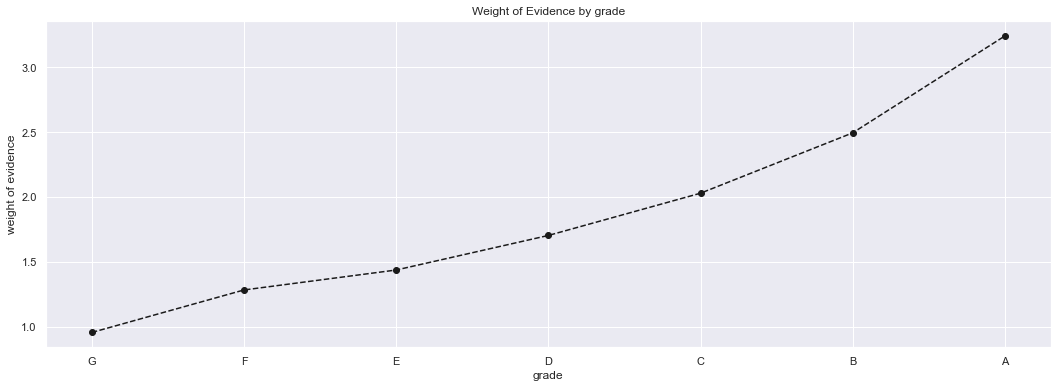

In [69]:
plot_by_woe(df_temp)

In [70]:
#Preprocessing discrete variables then create Dummy Variable 
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.844444,0.000483,38.0,7.0,0.000457,0.000084,1.691676,NaN,NaN,0.746194
1,RENT,37874,0.875719,0.406125,33167.0,4707.0,0.398570,0.056564,1.952505,0.031275,0.260829,0.746194
2,OWN,8409,0.889404,0.090170,7479.0,930.0,0.089876,0.011176,2.084670,0.013685,0.132165,0.746194
3,NONE,10,0.900000,0.000107,9.0,1.0,0.000108,0.000012,2.197225,0.010596,0.112555,0.746194
4,MORTGAGE,46919,0.906285,0.503115,42522.0,4397.0,0.510990,0.052839,2.269099,0.006285,0.071875,0.746194


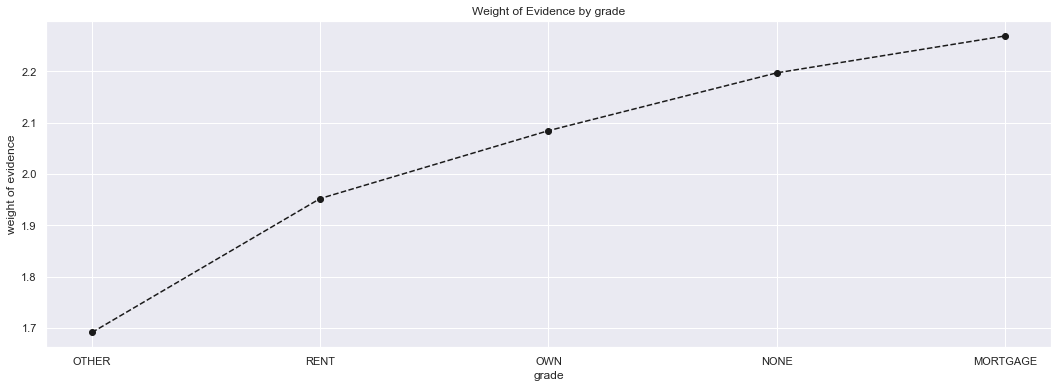

In [71]:
plot_by_woe(df_temp)

In [72]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

In [73]:
#Preprocessing discrete variables: Dummy Variables
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [74]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

c:\Users\Reza Vahlevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000012,-inf,NaN,NaN,inf
1,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000012,0.000000,0.500000,inf,inf
2,NV,1298,0.858243,0.013919,1114.0,184.0,0.013387,0.002211,1.800777,0.358243,1.800777e+00,inf
3,HI,486,0.860082,0.005211,418.0,68.0,0.005023,0.000817,1.815974,0.001839,1.519706e-02,inf
4,FL,6426,0.872549,0.068906,5607.0,819.0,0.067380,0.009842,1.923687,0.012467,1.077133e-01,inf
5,AL,1182,0.875635,0.012675,1035.0,147.0,0.012438,0.001767,1.951724,0.003085,2.803711e-02,inf
6,LA,1130,0.876991,0.012117,991.0,139.0,0.011909,0.001670,1.964241,0.001357,1.251648e-02,inf
7,NJ,3676,0.878128,0.039418,3228.0,448.0,0.038791,0.005384,1.974825,0.001137,1.058420e-02,inf
8,NY,8031,0.880837,0.086117,7074.0,957.0,0.085009,0.011500,2.000378,0.002708,2.555318e-02,inf
9,RI,403,0.880893,0.004321,355.0,48.0,0.004266,0.000577,2.000917,0.000057,5.388003e-04,inf


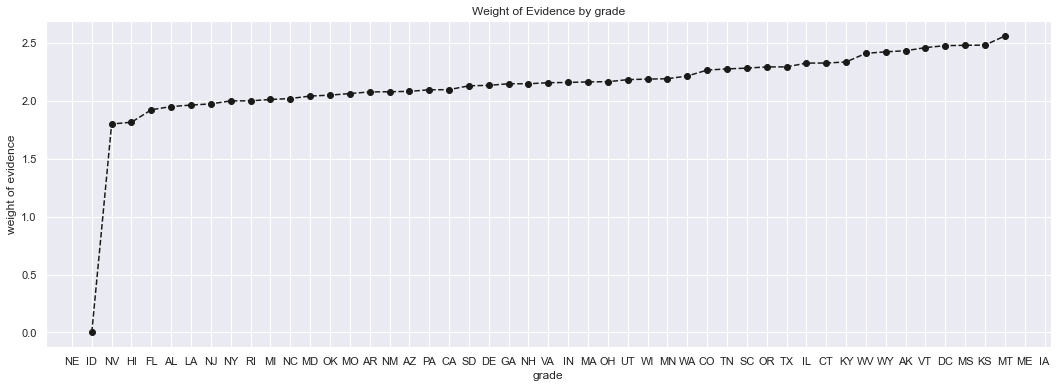

In [75]:
plot_by_woe(df_temp)

In [76]:
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

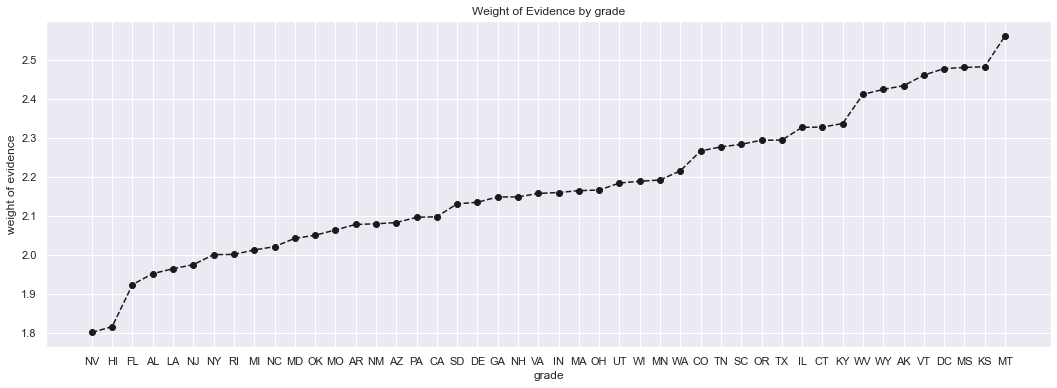

In [77]:
plot_by_woe(df_temp.iloc[2:-2, :])

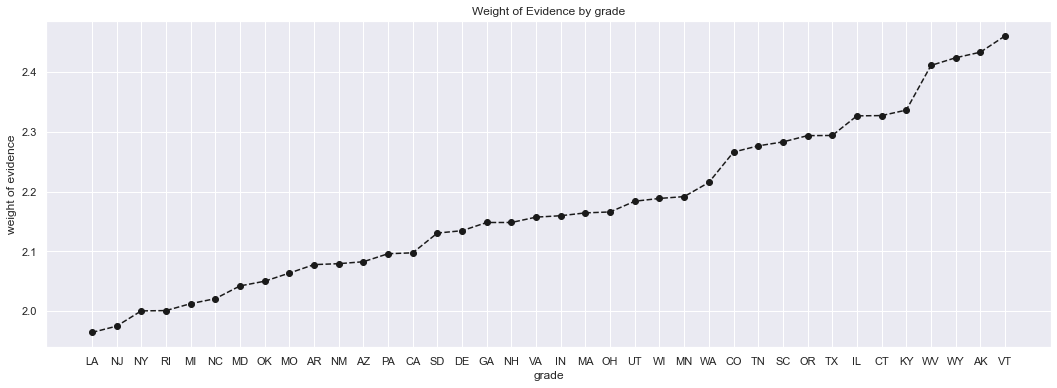

In [78]:
plot_by_woe(df_temp.iloc[6:-6, :])

In [79]:
df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'], df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])
df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])
df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])
df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])
df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [80]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [81]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.873369,0.360734,29381.0,4260.0,0.353073,0.051193,1.931079,NaN,NaN,0.746328
1,Source Verified,29963,0.896205,0.321295,26853.0,3110.0,0.322694,0.037373,2.155755,0.022837,0.224676,0.746328
2,Not Verified,29653,0.909891,0.317971,26981.0,2672.0,0.324232,0.032110,2.312306,0.013686,0.156551,0.746328


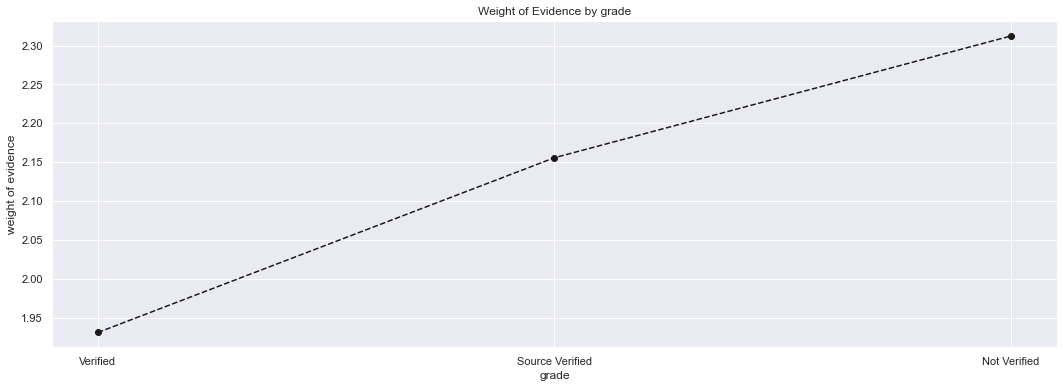

In [82]:
plot_by_woe(df_temp)

In [83]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'credit_card', 'debt_consolidation',
       'vacation', 'house', 'medical', 'small_business', 'car', 'other',
       'major_purchase', 'wedding', 'moving', 'educational',
       'renewable_energy'], dtype=object)

In [84]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000649,0.000192,1.216395,NaN,NaN,0.747346
1,small_business,1431,0.788959,0.015345,1129.0,302.0,0.013567,0.003629,1.318661,0.017530,0.102265,0.747346
2,educational,89,0.842697,0.000954,75.0,14.0,0.000901,0.000168,1.678431,0.053738,0.359770,0.747346
3,house,439,0.861048,0.004707,378.0,61.0,0.004542,0.000733,1.824020,0.018351,0.145590,0.747346
4,medical,918,0.863834,0.009844,793.0,125.0,0.009530,0.001502,1.847509,0.002787,0.023489,0.747346
5,other,4806,0.866209,0.051535,4163.0,643.0,0.050027,0.007727,1.867847,0.002374,0.020337,0.747346
6,wedding,456,0.868421,0.004890,396.0,60.0,0.004759,0.000721,1.887070,0.002212,0.019223,0.747346
7,moving,602,0.878738,0.006455,529.0,73.0,0.006357,0.000877,1.980529,0.010316,0.093459,0.747346
8,vacation,496,0.883065,0.005319,438.0,58.0,0.005263,0.000697,2.021776,0.004327,0.041247,0.747346
9,debt_consolidation,55012,0.886879,0.589897,48789.0,6223.0,0.586301,0.074782,2.059253,0.003815,0.037477,0.747346


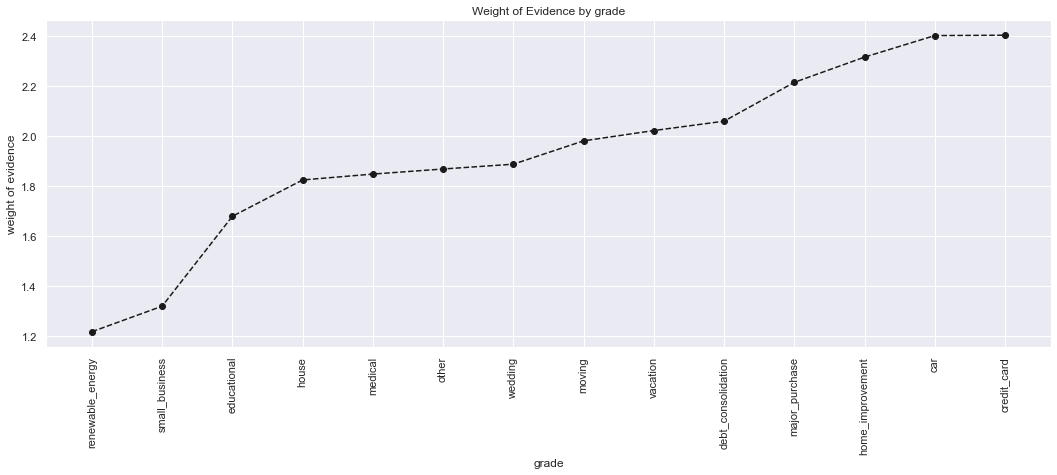

In [85]:
plot_by_woe(df_temp, 90)

In [86]:
df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house'] = sum([df_inputs_prepr['purpose:small_business'], df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'], df_inputs_prepr['purpose:moving'],
                                  -                              df_inputs_prepr['purpose:house'], df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'], df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'], df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'], df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'], df_inputs_prepr['purpose:credit_card']])

In [87]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [88]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60491,0.882131,0.648648,53361.0,7130.0,0.641243,0.085682,2.012769,NaN,NaN,0.746096
1,w,32766,0.911127,0.351352,29854.0,2912.0,0.358757,0.034994,2.327479,0.028996,0.31471,0.746096


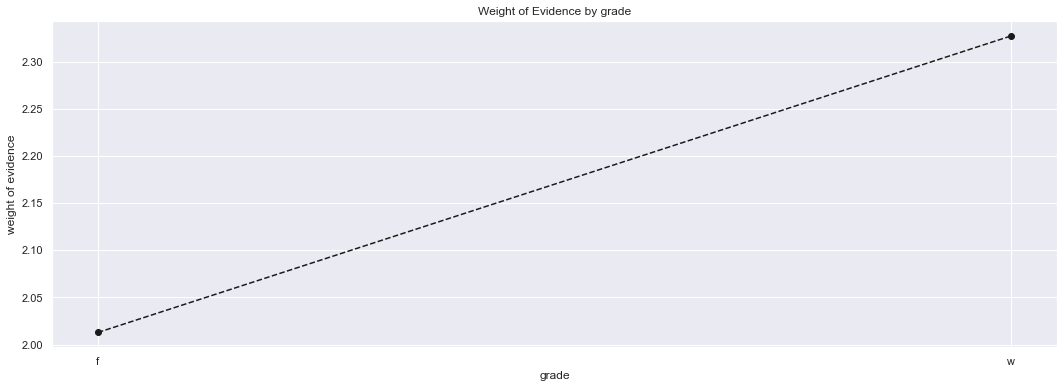

In [89]:
plot_by_woe(df_temp)

In [90]:
#Preprocessing continuous variables: automating calculations and visualizing the results
def woe_continuous(df, discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad'] * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [91]:
#Preprocessing continuous variables: creating dummy variables
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [92]:
df_temp = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.904522,0.724171,61086.0,6448.0,0.734074,0.077486,2.248513,NaN,NaN,0.74727
1,60,25723,0.860281,0.275829,22129.0,3594.0,0.265926,0.043189,1.817623,0.044241,0.43089,0.74727


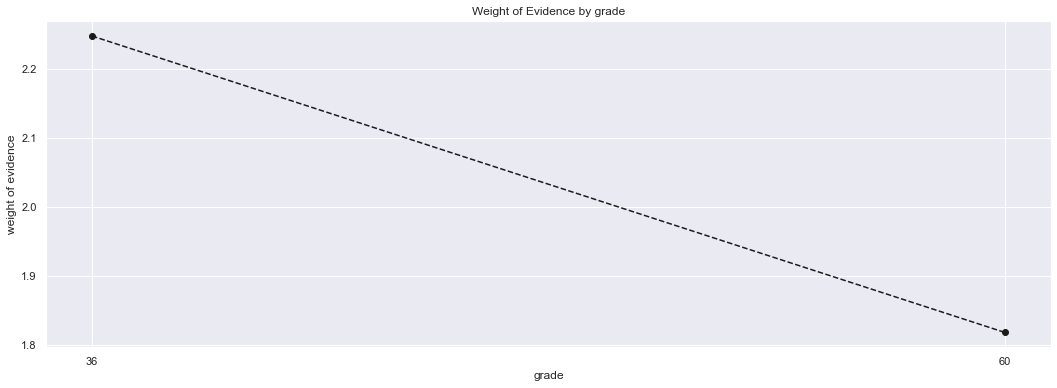

In [93]:
plot_by_woe(df_temp)

In [94]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)
df_inputs_prepr['emp_length_int'].unique()

array([0.0, 10.0, 1.0, 2.0, 9.0, '0', 3.0, 6.0, 4.0, 7.0, 8.0, 5.0],
      dtype=object)

In [95]:
df_temp = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7353,0.882905,0.078847,6492.0,861.0,0.078015,0.010347,2.020231,NaN,NaN,0.745323
1,1.0,5968,0.896113,0.063995,5348.0,620.0,0.064267,0.007451,2.154758,0.013208,0.134527,0.745323
2,2.0,8295,0.888849,0.088948,7373.0,922.0,0.088602,0.011080,2.079035,0.007264,0.075724,0.745323
3,3.0,7391,0.891084,0.079254,6586.0,805.0,0.079144,0.009674,2.101859,0.002235,0.022824,0.745323
4,4.0,5555,0.891449,0.059567,4952.0,603.0,0.059509,0.007246,2.105630,0.000365,0.003770,0.745323
5,5.0,6172,0.888205,0.066183,5482.0,690.0,0.065878,0.008292,2.072534,0.003244,0.033096,0.745323
6,6.0,5225,0.881148,0.056028,4604.0,621.0,0.055327,0.007463,2.003350,0.007056,0.069184,0.745323
7,7.0,5131,0.894562,0.055020,4590.0,541.0,0.055158,0.006501,2.138216,0.013414,0.134866,0.745323
8,8.0,4542,0.891458,0.048704,4049.0,493.0,0.048657,0.005924,2.105716,0.003105,0.032500,0.745323
9,9.0,3621,0.894504,0.038828,3239.0,382.0,0.038923,0.004591,2.137599,0.003047,0.031883,0.745323


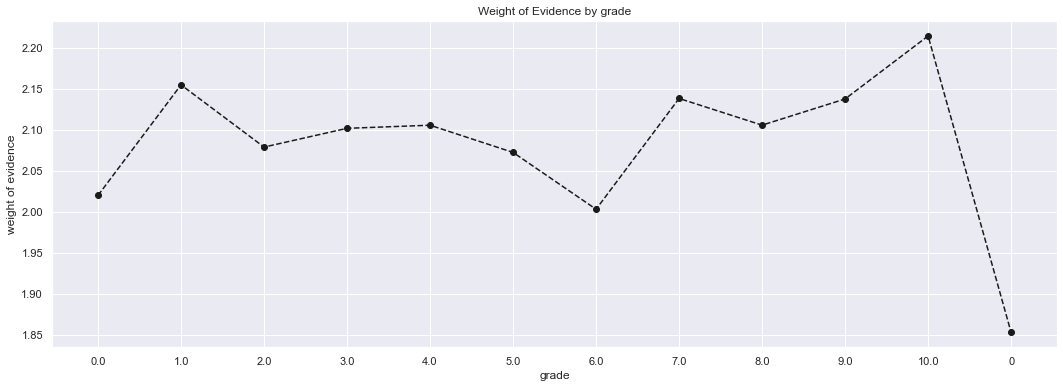

In [96]:
plot_by_woe(df_temp)

In [97]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [98]:
df_inputs_prepr['mths_since_issued_date'].unique()

array([ 65.,  62.,  90.,  61.,  82.,  74., 110.,  75.,  72.,  83.,  96.,
       101.,  71.,  70.,  80.,  79., 143.,  87., 126.,  63.,  77.,  64.,
        76.,  67.,  73.,  81.,  69.,  60.,  78.,  98.,  68.,  97., 127.,
        94., 119., 113.,  92., 106.,  95., 100., 128.,  89., 104., 115.,
        99.,  91.,  66.,  85.,  88.,  84., 109., 112., 134., 120., 102.,
       107.,  93., 114.,  86., 132., 103., 116., 142., 123., 105., 139.,
       121., 138., 140., 124., 117., 141., 130., 148., 125., 149., 111.,
       108., 118., 129., 133., 122., 131., 136., 137., 146., 135., 144.,
       145., 147., 150.])

In [99]:
df_inputs_prepr['mths_since_issued_date_factor'] = pd.cut(df_inputs_prepr['mths_since_issued_date'], 50)
df_inputs_prepr['mths_since_issued_date_factor']

362514     (63.6, 65.4]
288564     (61.8, 63.6]
213591     (88.8, 90.6]
263083    (59.91, 61.8]
165001     (81.6, 83.4]
              ...      
115        (94.2, 96.0]
296284     (61.8, 63.6]
61777      (72.6, 74.4]
91763      (74.4, 76.2]
167512     (81.6, 83.4]
Name: mths_since_issued_date_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(59.91, 61.8] < (61.8, 63.6] < (63.6, 65.4] < (65.4, 67.2] ... (142.8, 144.6] < (144.6, 146.4] < (146.4, 148.2] < (148.2, 150.0]]

In [100]:
df_temp = woe_continuous(df_inputs_prepr, 'mths_since_issued_date_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(59.91, 61.8]",7191,0.945766,0.077109,6801.0,390.0,0.081728,0.004687,2.858678,NaN,NaN,0.75117
1,"(61.8, 63.6]",9752,0.930373,0.104571,9073.0,679.0,0.109031,0.008160,2.592437,0.015392,0.266241,0.75117
2,"(63.6, 65.4]",9506,0.919945,0.101933,8745.0,761.0,0.105089,0.009145,2.441604,0.010428,0.150833,0.75117
3,"(65.4, 67.2]",7240,0.909116,0.077635,6582.0,658.0,0.079096,0.007907,2.302889,0.010829,0.138715,0.75117
4,"(67.2, 69.0]",7217,0.902868,0.077388,6516.0,701.0,0.078303,0.008424,2.229508,0.006248,0.073381,0.75117
5,"(69.0, 70.8]",3104,0.895296,0.033284,2779.0,325.0,0.033395,0.003906,2.146021,0.007572,0.083487,0.75117
6,"(70.8, 72.6]",6197,0.890269,0.066451,5517.0,680.0,0.066298,0.008172,2.093497,0.005027,0.052525,0.75117
7,"(72.6, 74.4]",5821,0.885930,0.062419,5157.0,664.0,0.061972,0.007979,2.049828,0.004339,0.043669,0.75117
8,"(74.4, 76.2]",5021,0.878909,0.053840,4413.0,608.0,0.053031,0.007306,1.982135,0.007022,0.067693,0.75117
9,"(76.2, 78.0]",4497,0.874138,0.048222,3931.0,566.0,0.047239,0.006802,1.938055,0.004770,0.044080,0.75117


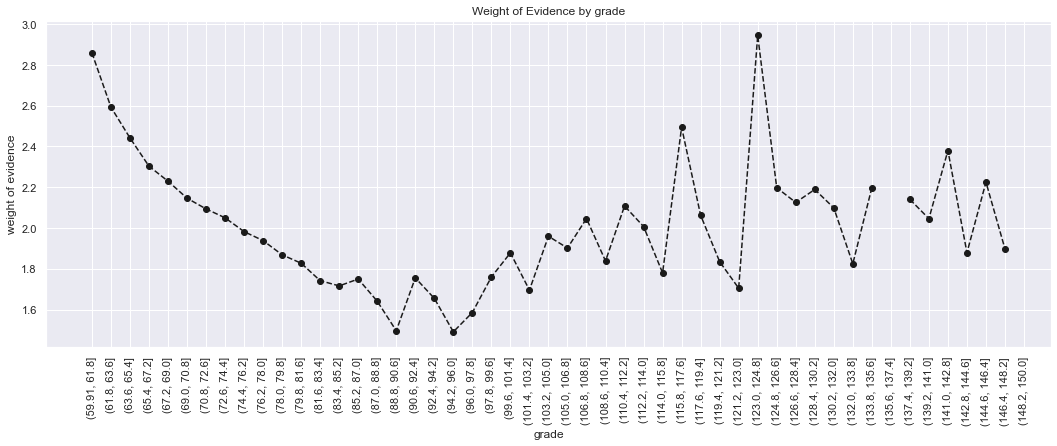

In [101]:
plot_by_woe(df_temp, 90)

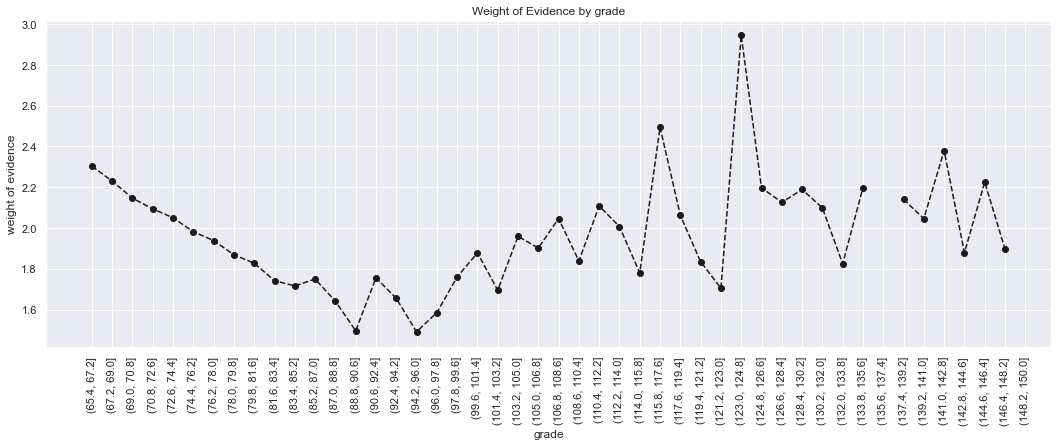

In [102]:
plot_by_woe(df_temp.iloc[3:, :], 90)

In [103]:
df_inputs_prepr['mths_since_issued_date:<38'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84'] = np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85, int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [104]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [105]:
df_temp = woe_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002307,0.000072,3.465736,NaN,NaN,0.765809
1,"(5.833, 6.246]",2086,0.979866,0.022368,2044.0,42.0,0.024563,0.000505,3.884994,0.010169,0.419258,0.765809
2,"(6.246, 6.658]",1974,0.972138,0.021167,1919.0,55.0,0.023061,0.000661,3.552226,0.007728,0.332768,0.765809
3,"(6.658, 7.071]",477,0.951782,0.005115,454.0,23.0,0.005456,0.000276,2.982603,0.020356,0.569623,0.765809
4,"(7.071, 7.484]",804,0.982587,0.008621,790.0,14.0,0.009493,0.000168,4.032976,0.030805,1.050373,0.765809
5,"(7.484, 7.897]",3245,0.965485,0.034796,3133.0,112.0,0.037649,0.001346,3.331247,0.017102,0.701728,0.765809
6,"(7.897, 8.31]",2429,0.951009,0.026046,2310.0,119.0,0.027759,0.001430,2.965879,0.014477,0.365368,0.765809
7,"(8.31, 8.722]",1680,0.966071,0.018015,1623.0,57.0,0.019504,0.000685,3.348980,0.015063,0.383101,0.765809
8,"(8.722, 9.135]",2384,0.942534,0.025564,2247.0,137.0,0.027002,0.001646,2.797370,0.023538,0.551610,0.765809
9,"(9.135, 9.548]",1590,0.976730,0.017050,1553.0,37.0,0.018663,0.000445,3.737026,0.034196,0.939656,0.765809


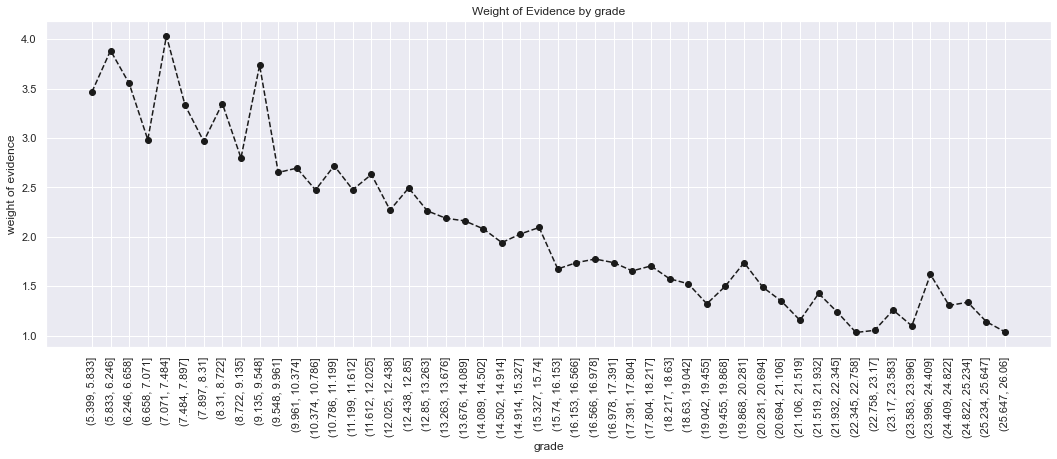

In [106]:
plot_by_woe(df_temp, 90)

In [107]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281),1,0)
df_inputs_prepr['int_rate:20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281),1,0)

In [108]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.890282,0.003421,284.0,35.0,0.003413,0.000421,2.093626,NaN,NaN,0.746073
1,"(1190.0, 1880.0]",800,0.897500,0.008578,718.0,82.0,0.008628,0.000985,2.169750,0.007218,0.076124,0.746073
2,"(1880.0, 2570.0]",1513,0.904164,0.016224,1368.0,145.0,0.016439,0.001742,2.244371,0.006664,0.074621,0.746073
3,"(2570.0, 3260.0]",1817,0.894882,0.019484,1626.0,191.0,0.019540,0.002295,2.141605,0.009282,0.102766,0.746073
4,"(3260.0, 3950.0]",1245,0.895582,0.013350,1115.0,130.0,0.013399,0.001562,2.149075,0.000701,0.007470,0.746073
5,"(3950.0, 4640.0]",2298,0.886423,0.024642,2037.0,261.0,0.024479,0.003136,2.054713,0.009159,0.094362,0.746073
6,"(4640.0, 5330.0]",3957,0.902704,0.042431,3572.0,385.0,0.042925,0.004627,2.227638,0.016281,0.172925,0.746073
7,"(5330.0, 6020.0]",4186,0.908743,0.044887,3804.0,382.0,0.045713,0.004591,2.298388,0.006039,0.070750,0.746073
8,"(6020.0, 6710.0]",1718,0.883586,0.018422,1518.0,200.0,0.018242,0.002403,2.026832,0.025158,0.271556,0.746073
9,"(6710.0, 7400.0]",2880,0.897222,0.030882,2584.0,296.0,0.031052,0.003557,2.166734,0.013637,0.139903,0.746073


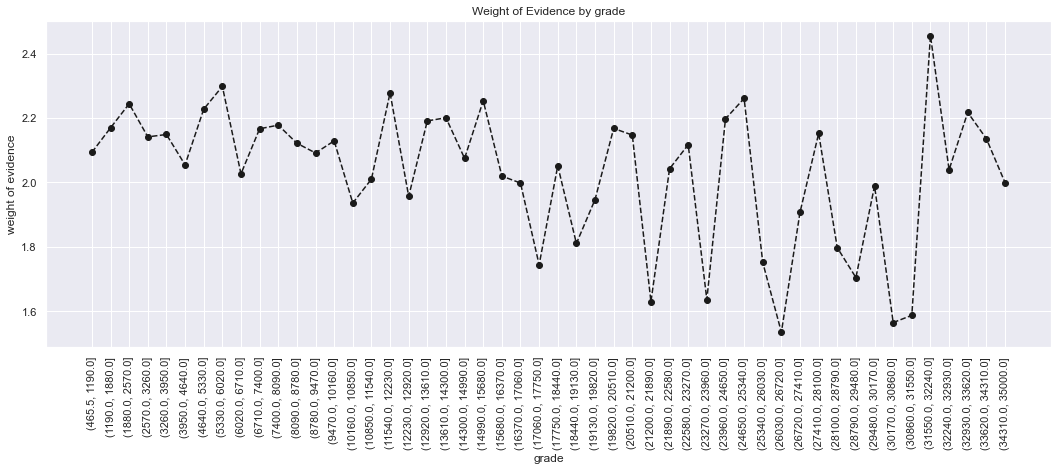

In [109]:
plot_by_woe(df_temp, 90)

In [110]:
df_inputs_prepr['mths_since_earliest_cr_line'] = df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor']

362514    (207.74, 219.96]
288564    (195.52, 207.74]
213591    (207.74, 219.96]
263083    (134.42, 146.64]
165001    (391.04, 403.26]
                ...       
115       (158.86, 171.08]
296284    (391.04, 403.26]
61777     (281.06, 293.28]
91763     (317.72, 329.94]
167512     (244.4, 256.62]
Name: mths_since_earliest_cr_line_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(-0.611, 12.22] < (12.22, 24.44] < (24.44, 36.66] < (36.66, 48.88] ... (562.12, 574.34] < (574.34, 586.56] < (586.56, 598.78] < (598.78, 611.0]]

In [111]:
df_temp = woe_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.611, 12.22]",5,1.000000,0.000054,5.0,0.0,0.000060,0.000000,inf,NaN,NaN,0.745824
1,"(12.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745824
2,"(24.44, 36.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745824
3,"(36.66, 48.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745824
4,"(48.88, 61.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745824
5,"(61.1, 73.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745824
6,"(73.32, 85.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745824
7,"(85.54, 97.76]",1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,NaN,NaN,0.745824
8,"(97.76, 109.98]",291,0.924399,0.003120,269.0,22.0,0.003233,0.000264,2.503669,0.075601,inf,0.745824
9,"(109.98, 122.2]",666,0.890390,0.007142,593.0,73.0,0.007126,0.000877,2.094735,0.034008,0.408934,0.745824


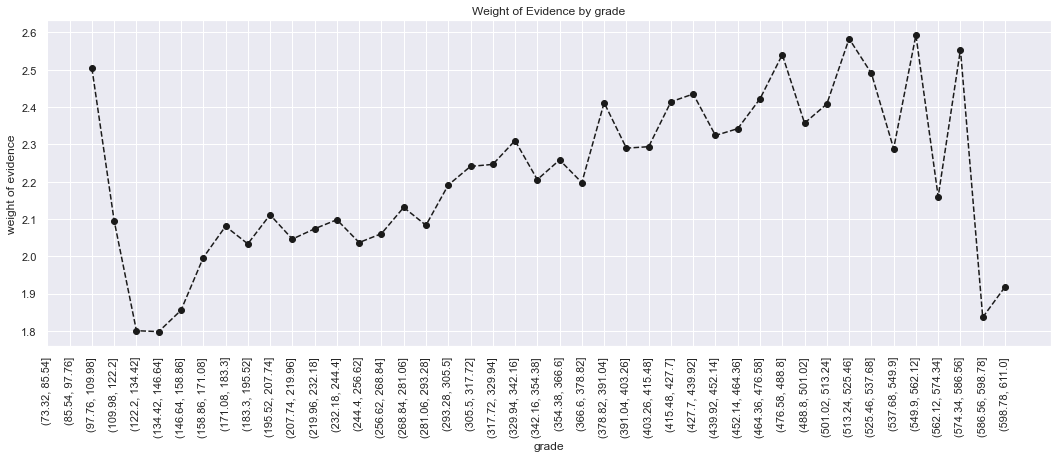

In [112]:
plot_by_woe(df_temp, 90)

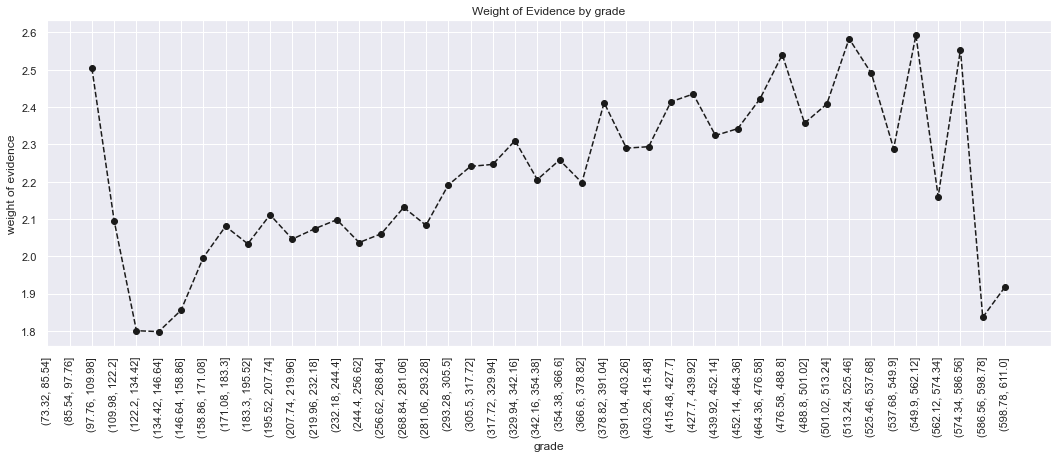

In [113]:
plot_by_woe(df_temp.iloc[3:, :], 90)

In [114]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,240)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,340)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,440)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,540)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,600)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(600, int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [115]:
df_inputs_prepr['installment'].unique()

array([ 773.01,  297.53, 1034.83, ...,  414.23,  494.33,  121.42])

In [116]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.369, 43.585]",485,0.880412,0.005201,427.0,58.0,0.005131,0.000697,1.996341,NaN,NaN,0.745791
1,"(43.585, 71.41]",1246,0.906902,0.013361,1130.0,116.0,0.013579,0.001394,2.276383,0.026490,0.280042,0.745791
2,"(71.41, 99.235]",1731,0.898325,0.018562,1555.0,176.0,0.018687,0.002115,2.178747,0.008577,0.097636,0.745791
3,"(99.235, 127.06]",2292,0.899651,0.024577,2062.0,230.0,0.024779,0.002764,2.193352,0.001326,0.014606,0.745791
4,"(127.06, 154.885]",2602,0.890085,0.027901,2316.0,286.0,0.027832,0.003437,2.091605,0.009566,0.101747,0.745791
5,"(154.885, 182.71]",4133,0.902492,0.044318,3730.0,403.0,0.044824,0.004843,2.225227,0.012408,0.133622,0.745791
6,"(182.71, 210.535]",4109,0.907033,0.044061,3727.0,382.0,0.044788,0.004591,2.277938,0.004541,0.052711,0.745791
7,"(210.535, 238.36]",3730,0.902949,0.039997,3368.0,362.0,0.040473,0.004350,2.230430,0.004084,0.047508,0.745791
8,"(238.36, 266.185]",4660,0.903219,0.049969,4209.0,451.0,0.050580,0.005420,2.233513,0.000270,0.003083,0.745791
9,"(266.185, 294.01]",4975,0.890050,0.053347,4428.0,547.0,0.053212,0.006573,2.091254,0.013169,0.142259,0.745791


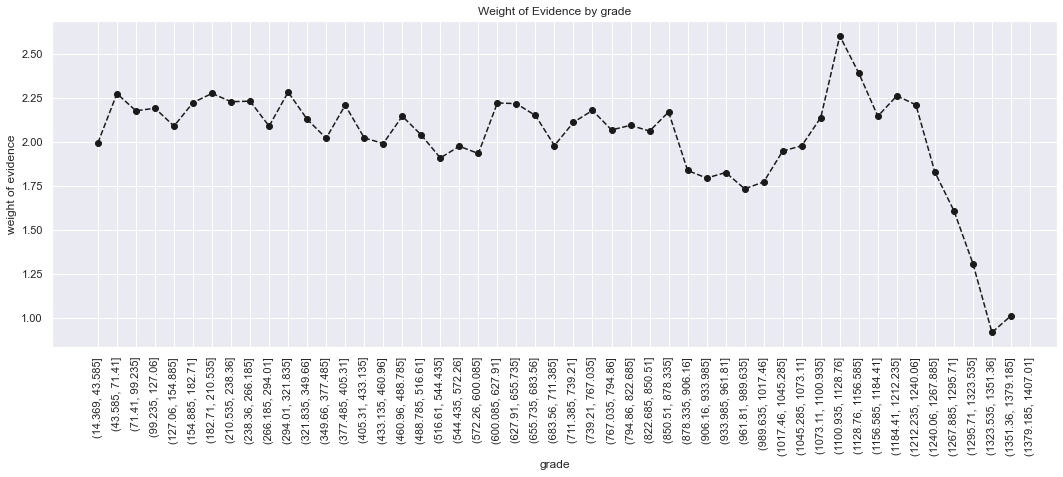

In [117]:
plot_by_woe(df_temp, 90)

In [118]:
df_inputs_prepr['delinq_2yrs'] = df_inputs_prepr['delinq_2yrs'].astype(float)
df_inputs_prepr['delinq_2yrs_factors'] = pd.cut(df_inputs_prepr['delinq_2yrs'], 50)
df_temp = woe_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76566,0.892642,0.821021,68346.0,8220.0,0.821318,0.098780,2.118013,NaN,NaN,0.74469
1,1.0,11297,0.891299,0.121138,10069.0,1228.0,0.121000,0.014757,2.104075,0.001343,0.013938,0.74469
2,2.0,3192,0.887218,0.034228,2832.0,360.0,0.034032,0.004326,2.062634,0.004081,0.041440,0.74469
3,3.0,1134,0.893298,0.012160,1013.0,121.0,0.012173,0.001454,2.124881,0.006080,0.062247,0.74469
4,4.0,510,0.888235,0.005469,453.0,57.0,0.005444,0.000685,2.072841,0.005063,0.052040,0.74469
5,5.0,270,0.911111,0.002895,246.0,24.0,0.002956,0.000288,2.327278,0.022876,0.254437,0.74469
6,6.0,128,0.859375,0.001373,110.0,18.0,0.001322,0.000216,1.810109,0.051736,0.517169,0.74469
7,7.0,67,0.925373,0.000718,62.0,5.0,0.000745,0.000060,2.517696,0.065998,0.707588,0.74469
8,8.0,29,0.896552,0.000311,26.0,3.0,0.000312,0.000036,2.159484,0.028821,0.358212,0.74469
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000252,0.000012,3.044522,0.057994,0.885038,0.74469


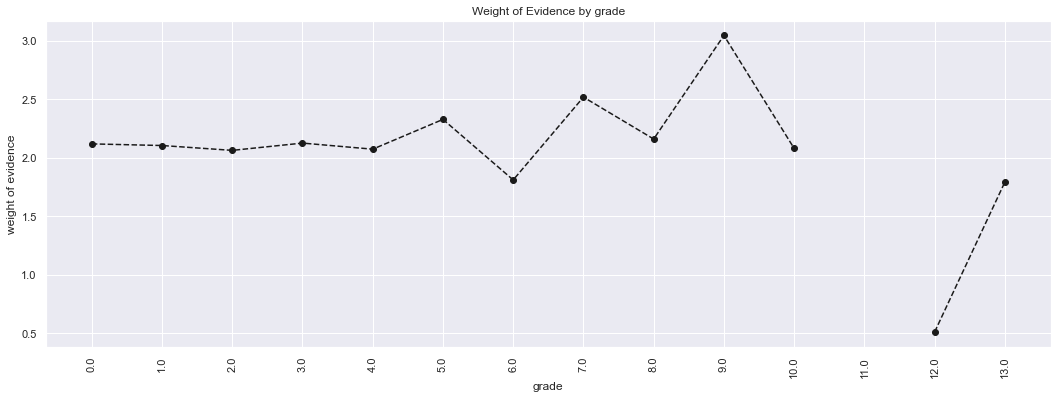

In [119]:
plot_by_woe(df_temp, 90)

In [120]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 0.0),1,0)
df_inputs_prepr['delinq_2yrs:0-3'] = np.where((df_inputs_prepr['delinq_2yrs'] > 0.0) & (df_inputs_prepr['delinq_2yrs'] <= 3),1,0)
df_inputs_prepr['delinq_2yrs:3-7'] = np.where((df_inputs_prepr['delinq_2yrs'] > 3) & (df_inputs_prepr['delinq_2yrs'] <= 7),1,0)
df_inputs_prepr['delinq_2yrs:7-9'] = np.where((df_inputs_prepr['delinq_2yrs'] > 7) & (df_inputs_prepr['delinq_2yrs'] <= 9),1,0)
df_inputs_prepr['delinq_2yrs:9-11'] = np.where((df_inputs_prepr['delinq_2yrs'] > 9) & (df_inputs_prepr['delinq_2yrs'] <= 11),1,0)
df_inputs_prepr['delinq_2yrs:11-12'] = np.where((df_inputs_prepr['delinq_2yrs'] > 11) & (df_inputs_prepr['delinq_2yrs'] <= 12),1,0)
df_inputs_prepr['delinq_2yrs:12-18'] = np.where((df_inputs_prepr['delinq_2yrs'] > 12) & (df_inputs_prepr['delinq_2yrs'] <= 18),1,0)
df_inputs_prepr['delinq_2yrs:>18'] = np.where((df_inputs_prepr['delinq_2yrs'] > 18),0,1)

In [121]:
df_inputs_prepr['inq_last_6mths'] = df_inputs_prepr['inq_last_6mths'].astype(float)
df_temp = woe_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48295,0.910260,0.517870,43961.0,4334.0,0.528282,0.052082,2.316812,NaN,NaN,0.747263
1,1.0,25985,0.883009,0.278639,22945.0,3040.0,0.275732,0.036532,2.021243,0.027250,0.295569,0.747263
2,2.0,11611,0.861941,0.124505,10008.0,1603.0,0.120267,0.019263,1.831508,0.021068,0.189735,0.747263
3,3.0,5086,0.847621,0.054537,4311.0,775.0,0.051806,0.009313,1.716062,0.014320,0.115446,0.747263
4,4.0,1431,0.869322,0.015345,1244.0,187.0,0.014949,0.002247,1.894979,0.021701,0.178917,0.747263
5,5.0,551,0.889292,0.005908,490.0,61.0,0.005888,0.000733,2.083532,0.019970,0.188553,0.747263
6,6.0,211,0.824645,0.002263,174.0,37.0,0.002091,0.000445,1.548137,0.064648,0.535394,0.747263
7,7.0,36,0.888889,0.000386,32.0,4.0,0.000385,0.000048,2.079442,0.064244,0.531304,0.747263
8,8.0,21,0.952381,0.000225,20.0,1.0,0.000240,0.000012,2.995732,0.063492,0.916291,0.747263
9,9.0,7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,0.047619,inf,0.747263


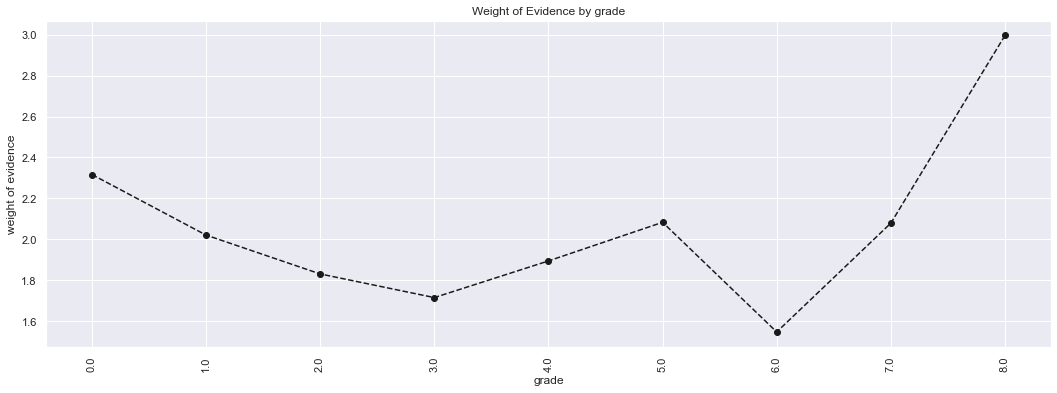

In [122]:
plot_by_woe(df_temp, 90)

In [123]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 0.0),1,0)
df_inputs_prepr['inq_last_6mths:0-3'] = np.where((df_inputs_prepr['inq_last_6mths'] > 0.0) & (df_inputs_prepr['inq_last_6mths'] <= 3),1,0)
df_inputs_prepr['inq_last_6mths:3-7'] = np.where((df_inputs_prepr['inq_last_6mths'] > 3) & (df_inputs_prepr['inq_last_6mths'] <= 7),1,0)
df_inputs_prepr['inq_last_6mths:7-9'] = np.where((df_inputs_prepr['inq_last_6mths'] > 7) & (df_inputs_prepr['inq_last_6mths'] <= 9),1,0)
df_inputs_prepr['inq_last_6mths:9-11'] = np.where((df_inputs_prepr['inq_last_6mths'] > 9) & (df_inputs_prepr['inq_last_6mths'] <= 11),1,0)
df_inputs_prepr['inq_last_6mths:11-12'] = np.where((df_inputs_prepr['inq_last_6mths'] > 11) & (df_inputs_prepr['inq_last_6mths'] <= 12),1,0)
df_inputs_prepr['inq_last_6mths:12-18'] = np.where((df_inputs_prepr['inq_last_6mths'] > 12) & (df_inputs_prepr['inq_last_6mths'] <= 18),1,0)
df_inputs_prepr['inq_last_6mths:18'] = np.where((df_inputs_prepr['inq_last_6mths'] > 18),0,1)

In [124]:
df_inputs_prepr['open_acc'] = df_inputs_prepr['open_acc'].astype(float)
df_temp = woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000084,0.000000,inf,NaN,NaN,0.744745
1,1.0,32,0.937500,0.000343,30.0,2.0,0.000361,0.000024,2.708050,0.062500,inf,0.744745
2,2.0,334,0.844311,0.003582,282.0,52.0,0.003389,0.000625,1.690663,0.093189,1.017387,0.744745
3,3.0,1122,0.860071,0.012031,965.0,157.0,0.011596,0.001887,1.815882,0.015760,0.125219,0.744745
4,4.0,2560,0.896484,0.027451,2295.0,265.0,0.027579,0.003185,2.158758,0.036413,0.342876,0.744745
5,5.0,4403,0.893936,0.047214,3936.0,467.0,0.047299,0.005612,2.131591,0.002548,0.027167,0.744745
6,6.0,6216,0.893018,0.066655,5551.0,665.0,0.066707,0.007991,2.121946,0.000918,0.009645,0.744745
7,7.0,7433,0.888470,0.079704,6604.0,829.0,0.079361,0.009962,2.075211,0.004548,0.046736,0.744745
8,8.0,8314,0.894756,0.089151,7439.0,875.0,0.089395,0.010515,2.140268,0.006285,0.065057,0.744745
9,9.0,8768,0.889484,0.094020,7799.0,969.0,0.093721,0.011645,2.085486,0.005271,0.054782,0.744745


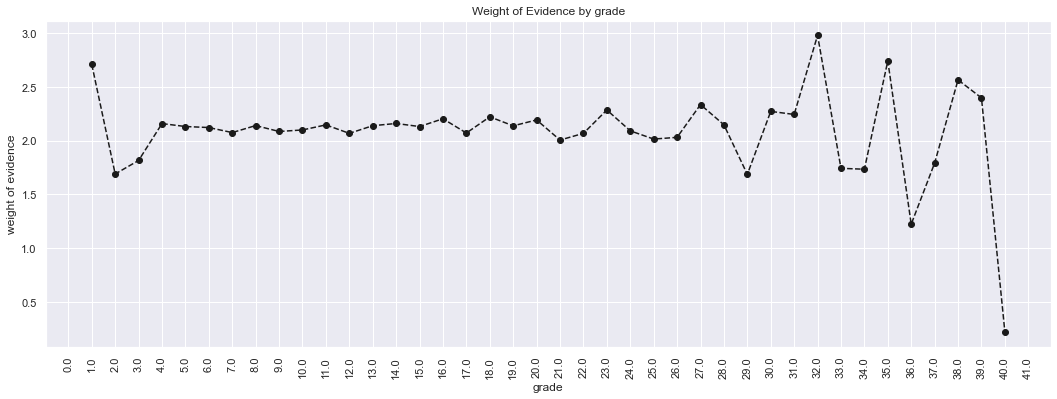

In [125]:
plot_by_woe(df_temp, 90)

In [126]:
df_inputs_prepr['open_acc:>=0'] = np.where((df_inputs_prepr['open_acc'] >= 0.0),1,0)
df_inputs_prepr['open_acc:0-1'] = np.where((df_inputs_prepr['open_acc'] > 0.0) & (df_inputs_prepr['open_acc'] <= 1),1,0)
df_inputs_prepr['open_acc:1-4'] = np.where((df_inputs_prepr['open_acc'] > 1) & (df_inputs_prepr['open_acc'] <= 4),1,0)
df_inputs_prepr['open_acc:4-28'] = np.where((df_inputs_prepr['open_acc'] > 4) & (df_inputs_prepr['open_acc'] <= 28),1,0)
df_inputs_prepr['open_acc:28-35'] = np.where((df_inputs_prepr['open_acc'] > 28) & (df_inputs_prepr['open_acc'] <= 35),1,0)
df_inputs_prepr['open_acc:35-45'] = np.where((df_inputs_prepr['open_acc'] > 35) & (df_inputs_prepr['open_acc'] <= 45),1,0)
df_inputs_prepr['open_acc:<45'] = np.where((df_inputs_prepr['open_acc'] <= 45),0,1)

In [127]:
df_inputs_prepr['pub_rec'] = df_inputs_prepr['pub_rec'].astype(float)
df_temp = woe_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80923,0.890810,0.867742,72087.0,8836.0,0.866274,0.106183,2.099039,NaN,NaN,0.744805
1,1.0,10670,0.902624,0.114415,9631.0,1039.0,0.115736,0.012486,2.226728,0.011814,0.127689,0.744805
2,2.0,1097,0.904284,0.011763,992.0,105.0,0.011921,0.001262,2.245763,0.001660,0.019034,0.744805
3,3.0,331,0.900302,0.003549,298.0,33.0,0.003581,0.000397,2.200586,0.003982,0.045177,0.744805
4,4.0,112,0.857143,0.001201,96.0,16.0,0.001154,0.000192,1.791759,0.043159,0.408826,0.744805
5,5.0,73,0.904110,0.000783,66.0,7.0,0.000793,0.000084,2.243745,0.046967,0.451985,0.744805
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000204,0.000024,2.140066,0.009373,0.103678,0.744805
7,7.0,14,0.785714,0.000150,11.0,3.0,0.000132,0.000036,1.299283,0.109023,0.840783,0.744805
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000048,0.000012,1.386294,0.014286,0.087011,0.744805
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.200000,inf,0.744805


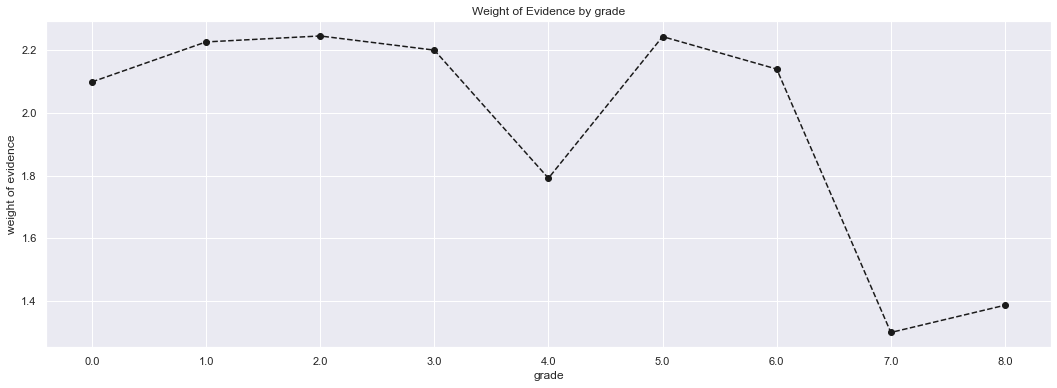

In [128]:
plot_by_woe(df_temp)

In [129]:
df_inputs_prepr['pub_rec:0-3'] = np.where((df_inputs_prepr['pub_rec'] > 0) & (df_inputs_prepr['pub_rec'] <= 3),1,0)
df_inputs_prepr['pub_rec:3-6'] = np.where((df_inputs_prepr['pub_rec'] > 3) & (df_inputs_prepr['pub_rec'] <= 6),1,0)
df_inputs_prepr['pub_rec:6-8'] = np.where((df_inputs_prepr['pub_rec'] > 6) & (df_inputs_prepr['pub_rec'] <= 8),1,0)
df_inputs_prepr['pub_rec:8'] = np.where((df_inputs_prepr['pub_rec'] > 8),0,1)

In [130]:
df_inputs_prepr['total_acc'] = df_inputs_prepr['total_acc'].astype(float)
df_inputs_prepr['total_acc_fac'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [131]:
df_temp = woe_continuous(df_inputs_prepr, 'total_acc_fac', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",125,0.816000,0.001340,102.0,23.0,0.001226,0.000276,1.489479,NaN,NaN,0.745099
1,"(3.12, 6.24]",1499,0.859907,0.016074,1289.0,210.0,0.015490,0.002524,1.814514,0.043907,0.325036,0.745099
2,"(6.24, 9.36]",3715,0.874024,0.039836,3247.0,468.0,0.039019,0.005624,1.937018,0.014118,0.122504,0.745099
3,"(9.36, 12.48]",6288,0.877067,0.067427,5515.0,773.0,0.066274,0.009289,1.964948,0.003043,0.027929,0.745099
4,"(12.48, 15.6]",8289,0.889733,0.088883,7375.0,914.0,0.088626,0.010984,2.088021,0.012666,0.123073,0.745099
5,"(15.6, 18.72]",9843,0.891496,0.105547,8775.0,1068.0,0.105450,0.012834,2.106119,0.001763,0.018098,0.745099
6,"(18.72, 21.84]",10270,0.894937,0.110126,9191.0,1079.0,0.110449,0.012966,2.142190,0.003440,0.036071,0.745099
7,"(21.84, 24.96]",9971,0.894494,0.106920,8919.0,1052.0,0.107180,0.012642,2.137491,0.000443,0.004699,0.745099
8,"(24.96, 28.08]",11873,0.893793,0.127315,10612.0,1261.0,0.127525,0.015154,2.130080,0.000701,0.007410,0.745099
9,"(28.08, 31.2]",7289,0.893127,0.078160,6510.0,779.0,0.078231,0.009361,2.123084,0.000666,0.006997,0.745099


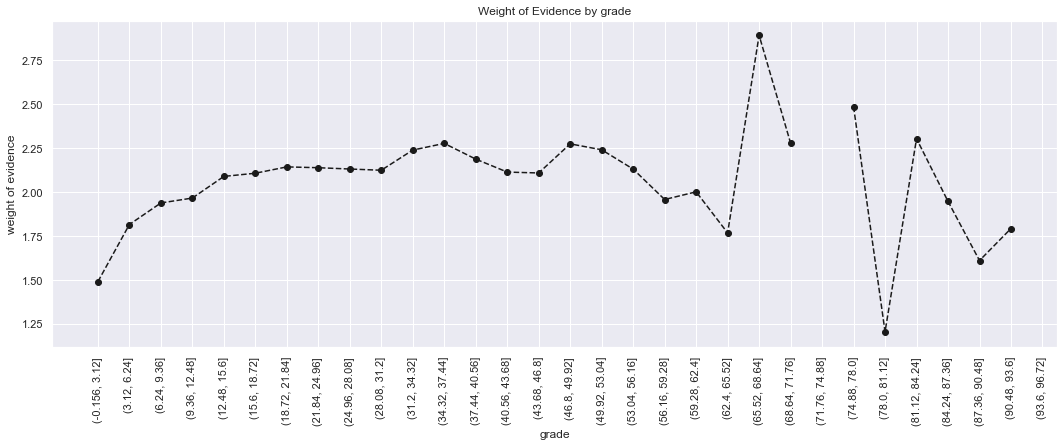

In [132]:
plot_by_woe(df_temp, 90)

In [133]:
df_inputs_prepr['total_acc:<0'] = np.where((df_inputs_prepr['total_acc'] < 0),0,1)
df_inputs_prepr['total_acc:0-4'] = np.where((df_inputs_prepr['total_acc'] > 0) & (df_inputs_prepr['total_acc'] <= 4),1,0)
df_inputs_prepr['total_acc:4-62'] = np.where((df_inputs_prepr['total_acc'] > 4) & (df_inputs_prepr['total_acc'] <= 62),1,0)
df_inputs_prepr['total_acc:62-72'] = np.where((df_inputs_prepr['total_acc'] > 62) & (df_inputs_prepr['total_acc'] <= 72),1,0)
df_inputs_prepr['total_acc:72-85'] = np.where((df_inputs_prepr['total_acc'] > 72) & (df_inputs_prepr['total_acc'] <= 85),0,1)
df_inputs_prepr['total_acc:>85'] = np.where((df_inputs_prepr['total_acc'] > 85),0,1)

In [134]:
df_inputs_prepr['acc_now_delinq'] = df_inputs_prepr['acc_now_delinq'].astype(float)
df_temp = woe_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92871,0.892421,0.995861,82880.0,9991.0,0.995974,0.120062,2.115709,NaN,NaN,0.744835
1,1.0,360,0.872222,0.003860,314.0,46.0,0.003773,0.000553,1.920752,0.020198,0.194958,0.744835
2,2.0,22,0.818182,0.000236,18.0,4.0,0.000216,0.000048,1.504077,0.054040,0.416674,0.744835
3,3.0,4,0.750000,0.000043,3.0,1.0,0.000036,0.000012,1.098612,0.068182,0.405465,0.744835


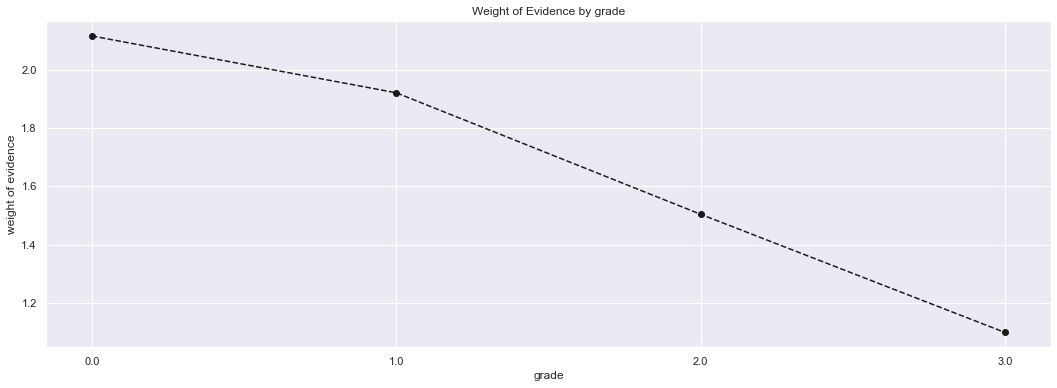

In [135]:
plot_by_woe(df_temp)

In [136]:
df_inputs_prepr['acc_now_delinq:<0'] = np.where((df_inputs_prepr['acc_now_delinq'] < 0),0,1)
df_inputs_prepr['acc_now_delinq:0-1'] = np.where((df_inputs_prepr['acc_now_delinq'] > 0) & (df_inputs_prepr['acc_now_delinq'] <= 1),1,0)
df_inputs_prepr['acc_now_delinq:1-2'] = np.where((df_inputs_prepr['acc_now_delinq'] > 1) & (df_inputs_prepr['acc_now_delinq'] <= 2),1,0)
df_inputs_prepr['acc_now_delinq:2-3'] = np.where((df_inputs_prepr['acc_now_delinq'] > 2) & (df_inputs_prepr['acc_now_delinq'] <= 3),1,0)
df_inputs_prepr['acc_now_delinq:3-5'] = np.where((df_inputs_prepr['acc_now_delinq'] > 3) & (df_inputs_prepr['acc_now_delinq'] <= 5),0,1)
df_inputs_prepr['acc_now_delinq:>5'] = np.where((df_inputs_prepr['acc_now_delinq'] > 5),0,1)

In [137]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim'] <= 80000, :]

In [138]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'], 50)
df_temp = woe_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 1600.0]",561,0.812834,0.006256,456.0,105.0,0.005711,0.001315,1.468532,NaN,NaN,0.74395
1,"(1600.0, 3200.0]",1670,0.868263,0.018622,1450.0,220.0,0.018161,0.002756,1.885691,0.055429,0.417159,0.74395
2,"(3200.0, 4800.0]",2517,0.876838,0.028067,2207.0,310.0,0.027643,0.003883,1.962817,0.008574,0.077126,0.74395
3,"(4800.0, 6400.0]",4128,0.878634,0.046032,3627.0,501.0,0.045428,0.006275,1.979555,0.001796,0.016738,0.74395
4,"(6400.0, 8000.0]",4393,0.879354,0.048987,3863.0,530.0,0.048384,0.006638,1.986322,0.000720,0.006767,0.74395
5,"(8000.0, 9600.0]",4161,0.878875,0.046400,3657.0,504.0,0.045804,0.006313,1.981822,0.000478,0.004500,0.74395
6,"(9600.0, 11200.0]",5151,0.877694,0.057439,4521.0,630.0,0.056626,0.007891,1.970769,0.001182,0.011053,0.74395
7,"(11200.0, 12800.0]",4752,0.877736,0.052990,4171.0,581.0,0.052242,0.007277,1.971160,0.000042,0.000392,0.74395
8,"(12800.0, 14400.0]",4349,0.882962,0.048496,3840.0,509.0,0.048096,0.006375,2.020780,0.005226,0.049619,0.74395
9,"(14400.0, 16000.0]",4909,0.880016,0.054741,4320.0,589.0,0.054108,0.007377,1.992584,0.002945,0.028195,0.74395


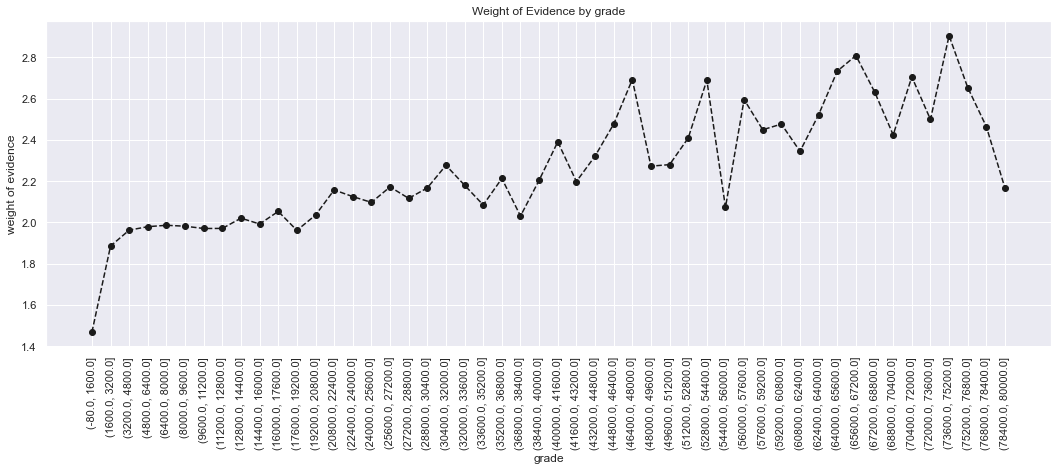

In [139]:
plot_by_woe(df_temp, 90)

In [140]:
df_inputs_prepr['total_rev_hi_lim:<=5k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000),1,0)
df_inputs_prepr['total_rev_hi_lim:5k_10k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000),1,0)
df_inputs_prepr['total_rev_hi_lim:10k_20k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000),1,0)
df_inputs_prepr['total_rev_hi_lim:20k_30k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000),1,0)
df_inputs_prepr['total_rev_hi_lim:30k_40k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000),1,0)
df_inputs_prepr['total_rev_hi_lim:40k_50k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 50000),1,0)
df_inputs_prepr['total_rev_hi_lim:50k_65k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 50000) & (df_inputs_prepr['total_rev_hi_lim'] <= 65000),1,0)
df_inputs_prepr['total_rev_hi_lim:65k_80k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 65000) & (df_inputs_prepr['total_rev_hi_lim'] <= 80000),1,0)
df_inputs_prepr['total_rev_hi_lim:>80k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 80000),1,0)

In [141]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.879673,0.671488,55086.0,7535.0,0.661972,0.090549,1.989337,NaN,NaN,0.746769
1,"(79752.0, 154704.0]",26582,0.916334,0.285040,24358.0,2224.0,0.292712,0.026726,2.393553,0.036661,0.404216,0.746769
2,"(154704.0, 229656.0]",2916,0.928669,0.031268,2708.0,208.0,0.032542,0.002500,2.566428,0.012335,0.172875,0.746769
3,"(229656.0, 304608.0]",710,0.930986,0.007613,661.0,49.0,0.007943,0.000589,2.601934,0.002317,0.035506,0.746769
4,"(304608.0, 379560.0]",171,0.929825,0.001834,159.0,12.0,0.001911,0.000144,2.583998,0.001161,0.017936,0.746769
5,"(379560.0, 454512.0]",111,0.927928,0.001190,103.0,8.0,0.001238,0.000096,2.555287,0.001897,0.028710,0.746769
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000613,0.000024,3.238678,0.034336,0.683391,0.746769
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000385,0.000012,3.465736,0.007433,0.227057,0.746769
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000120,0.000000,inf,0.030303,inf,0.746769
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000144,0.000012,2.484907,0.076923,inf,0.746769


In [142]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]

In [143]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_3780\3419813688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000128,0.000000,inf,NaN,NaN,0.74468
1,"(7504.0, 10208.0]",84,0.773810,0.000958,65.0,19.0,0.000833,0.000243,1.229948,0.226190,inf,0.74468
2,"(10208.0, 12912.0]",123,0.788618,0.001403,97.0,26.0,0.001243,0.000333,1.316614,0.014808,0.086666,0.74468
3,"(12912.0, 15616.0]",304,0.861842,0.003467,262.0,42.0,0.003357,0.000538,1.830675,0.073224,0.514060,0.74468
4,"(15616.0, 18320.0]",383,0.830287,0.004368,318.0,65.0,0.004075,0.000833,1.587664,0.031555,0.243011,0.74468
5,"(18320.0, 21024.0]",733,0.847203,0.008359,621.0,112.0,0.007958,0.001435,1.712832,0.016916,0.125168,0.74468
6,"(21024.0, 23728.0]",704,0.849432,0.008028,598.0,106.0,0.007663,0.001358,1.730152,0.002229,0.017319,0.74468
7,"(23728.0, 26432.0]",1785,0.863866,0.020356,1542.0,243.0,0.019759,0.003114,1.847774,0.014434,0.117622,0.74468
8,"(26432.0, 29136.0]",1355,0.853875,0.015452,1157.0,198.0,0.014826,0.002537,1.765319,0.009991,0.082455,0.74468
9,"(29136.0, 31840.0]",2292,0.858202,0.026137,1967.0,325.0,0.025205,0.004165,1.800440,0.004328,0.035121,0.74468


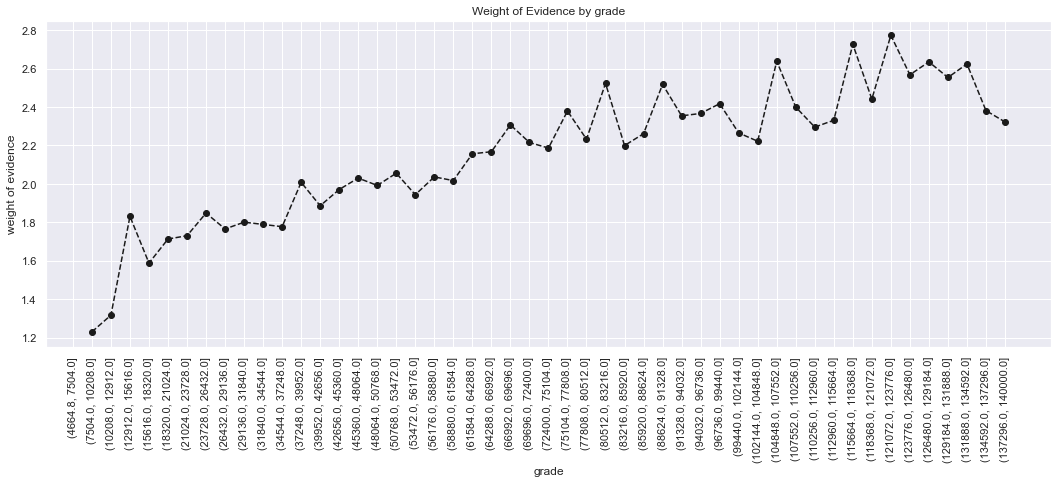

In [144]:
plot_by_woe(df_temp, 90)

In [145]:
df_inputs_prepr['annual_inc:<20k'] = np.where((df_inputs_prepr['annual_inc'] <= 20000),1,0)
df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000),1,0)
df_inputs_prepr['annual_inc:30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000),1,0)
df_inputs_prepr['annual_inc:40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000),1,0)
df_inputs_prepr['annual_inc:50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000),1,0)
df_inputs_prepr['annual_inc:60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000),1,0)
df_inputs_prepr['annual_inc:70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000),1,0)
df_inputs_prepr['annual_inc:80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000),1,0)
df_inputs_prepr['annual_inc:90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000),1,0)
df_inputs_prepr['annual_inc:100k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000),1,0)
df_inputs_prepr['annual_inc:120k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000),1,0)
df_inputs_prepr['annual_inc:>140k'] = np.where((df_inputs_prepr['annual_inc'] > 140000),1,0)

In [146]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr)
df_temp

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_3780\1348332600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.887982,0.031283,1197.0,151.0,0.031116,0.003925,2.070294,NaN,NaN,0.745088
1,"(3.4, 6.8]",1890,0.882011,0.043861,1667.0,223.0,0.043334,0.005797,2.011609,0.005972,0.058685,0.745088
2,"(6.8, 10.2]",3373,0.887341,0.078276,2993.0,380.0,0.077803,0.009878,2.063860,0.005330,0.052251,0.745088
3,"(10.2, 13.6]",2496,0.897035,0.057924,2239.0,257.0,0.058203,0.006681,2.164709,0.009695,0.100848,0.745088
4,"(13.6, 17.0]",3165,0.885308,0.073449,2802.0,363.0,0.072838,0.009436,2.043686,0.011727,0.121023,0.745088
5,"(17.0, 20.4]",2282,0.894829,0.052958,2042.0,240.0,0.053082,0.006239,2.141046,0.009521,0.097360,0.745088
6,"(20.4, 23.8]",2115,0.898818,0.049082,1901.0,214.0,0.049416,0.005563,2.184159,0.003989,0.043113,0.745088
7,"(23.8, 27.2]",2755,0.896552,0.063934,2470.0,285.0,0.064208,0.007409,2.159484,0.002266,0.024675,0.745088
8,"(27.2, 30.6]",1929,0.897356,0.044766,1731.0,198.0,0.044997,0.005147,2.168188,0.000804,0.008703,0.745088
9,"(30.6, 34.0]",2453,0.892784,0.056926,2190.0,263.0,0.056929,0.006837,2.119503,0.004572,0.048685,0.745088


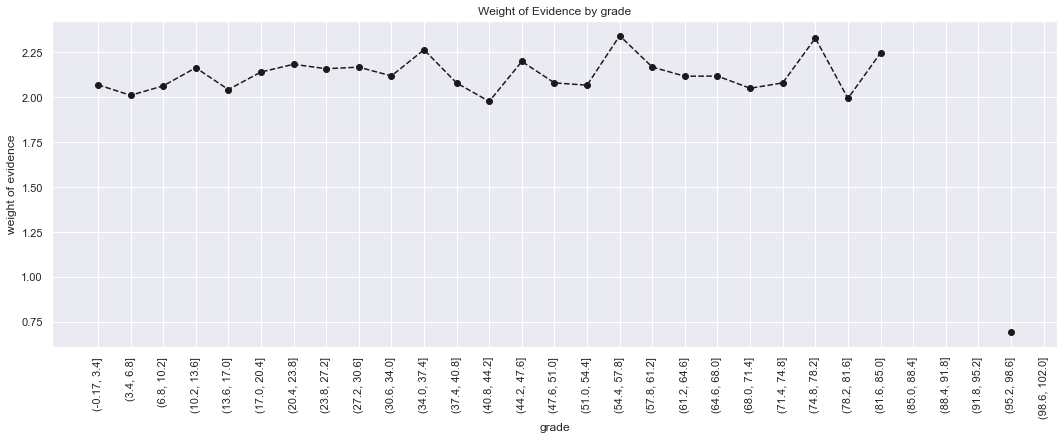

In [147]:
plot_by_woe(df_temp, 90)

In [148]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3),1,0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30),1,0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56),1,0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57),1,0)

In [149]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 50)
df_temp = woe_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",371,0.902965,0.003978,335.0,36.0,0.004026,0.000433,2.230612,NaN,NaN,0.746899
1,"(0.8, 1.6]",478,0.903766,0.005126,432.0,46.0,0.005191,0.000553,2.239784,0.000801,0.009173,0.746899
2,"(1.6, 2.399]",639,0.909233,0.006852,581.0,58.0,0.006982,0.000697,2.304308,0.005467,0.064524,0.746899
3,"(2.399, 3.199]",808,0.915842,0.008664,740.0,68.0,0.008893,0.000817,2.387142,0.006608,0.082835,0.746899
4,"(3.199, 3.999]",1047,0.920726,0.011227,964.0,83.0,0.011584,0.000997,2.452251,0.004884,0.065108,0.746899
5,"(3.999, 4.799]",1260,0.914286,0.013511,1152.0,108.0,0.013844,0.001298,2.367124,0.006440,0.085127,0.746899
6,"(4.799, 5.599]",1527,0.914866,0.016374,1397.0,130.0,0.016788,0.001562,2.374548,0.000580,0.007424,0.746899
7,"(5.599, 6.398]",1730,0.905780,0.018551,1567.0,163.0,0.018831,0.001959,2.263168,0.009085,0.111380,0.746899
8,"(6.398, 7.198]",1999,0.921461,0.021435,1842.0,157.0,0.022135,0.001887,2.462361,0.015680,0.199193,0.746899
9,"(7.198, 7.998]",2227,0.910642,0.023880,2028.0,199.0,0.024371,0.002391,2.321501,0.010819,0.140861,0.746899


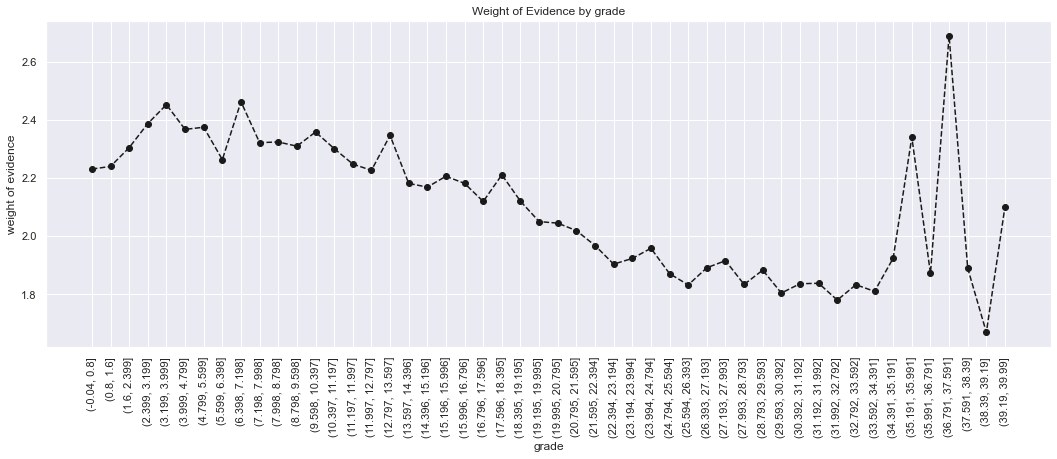

In [150]:
plot_by_woe(df_temp, 90)

In [151]:
df_inputs_prepr['dti:<5'] = np.where((df_inputs_prepr['dti'] <= 5),1,0)
df_inputs_prepr['dti:5-10'] = np.where((df_inputs_prepr['dti'] > 5) & (df_inputs_prepr['dti'] <= 10),1,0)
df_inputs_prepr['dti:10-15'] = np.where((df_inputs_prepr['dti'] > 10) & (df_inputs_prepr['dti'] <= 15),1,0)
df_inputs_prepr['dti:15-20'] = np.where((df_inputs_prepr['dti'] > 15) & (df_inputs_prepr['dti'] <= 20),1,0)
df_inputs_prepr['dti:20-25'] = np.where((df_inputs_prepr['dti'] > 20) & (df_inputs_prepr['dti'] <= 25),1,0)
df_inputs_prepr['dti:25-30'] = np.where((df_inputs_prepr['dti'] > 25) & (df_inputs_prepr['dti'] <= 30),1,0)
df_inputs_prepr['dti:30-35'] = np.where((df_inputs_prepr['dti'] > 30) & (df_inputs_prepr['dti'] <= 35),1,0)
df_inputs_prepr['dti:35-40'] = np.where((df_inputs_prepr['dti'] > 35) & (df_inputs_prepr['dti'] <= 40),1,0)
df_inputs_prepr['dti:>40'] = np.where((df_inputs_prepr['dti'] > 40),1,0)

In [152]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

C:\Users\Reza Vahlevi\AppData\Local\Temp\ipykernel_3780\3279516905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)


In [153]:
df_temp = woe_continuous(df_inputs_prepr_temp, 'mths_since_last_record', df_targets_prepr)
df_temp

c:\Users\Reza Vahlevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",244,0.881148,0.019410,215.0,29.0,0.018964,0.002558,2.003342,NaN,NaN,inf
1,"(2.58, 5.16]",36,0.888889,0.002864,32.0,4.0,0.002823,0.000353,2.079442,0.007741,0.076099,inf
2,"(5.16, 7.74]",39,0.923077,0.003102,36.0,3.0,0.003175,0.000265,2.484907,0.034188,0.405465,inf
3,"(7.74, 10.32]",66,0.939394,0.005250,62.0,4.0,0.005469,0.000353,2.740840,0.016317,0.255933,inf
4,"(10.32, 12.9]",42,0.833333,0.003341,35.0,7.0,0.003087,0.000617,1.609438,0.106061,1.131402,inf
5,"(12.9, 15.48]",69,0.869565,0.005489,60.0,9.0,0.005292,0.000794,1.897120,0.036232,0.287682,inf
6,"(15.48, 18.06]",95,0.873684,0.007557,83.0,12.0,0.007321,0.001058,1.933934,0.004119,0.036814,inf
7,"(18.06, 20.64]",58,0.965517,0.004614,56.0,2.0,0.004940,0.000176,3.332205,0.091833,1.398271,inf
8,"(20.64, 23.22]",101,0.891089,0.008034,90.0,11.0,0.007939,0.000970,2.101914,0.074428,1.230290,inf
9,"(23.22, 25.8]",94,0.946809,0.007478,89.0,5.0,0.007850,0.000441,2.879198,0.055719,0.777284,inf


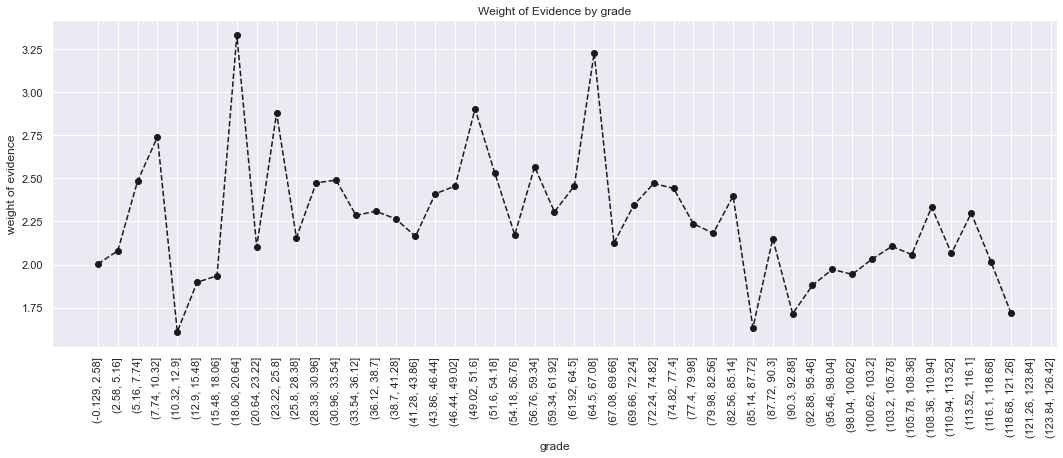

In [154]:
plot_by_woe(df_temp, 90)

In [155]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr['mths_since_last_record:0-90'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 90),1,0)
df_inputs_prepr['mths_since_last_record:90-120'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 90) & (df_inputs_prepr['mths_since_last_record'] <= 120),1,0)
df_inputs_prepr['mths_since_last_record:120-127'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 120) & (df_inputs_prepr['mths_since_last_record'] <= 127),1,0)
df_inputs_prepr['mths_since_last_record:>=127'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 127),1,0)

In [156]:
loan_data_inputs_train = load_ds_input_train
loan_data_inputs_train.shape

(373028, 208)

In [157]:
load_ds_targets_train.shape

(373028,)

In [158]:
loan_data_inputs_test = df_inputs_prepr
loan_data_inputs_test.shape

(93257, 339)

In [159]:
load_ds_targets_test.shape

(93257,)